In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

In [23]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(42000, 785)

df.shape

In [25]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import matplotlib.pyplot as plt

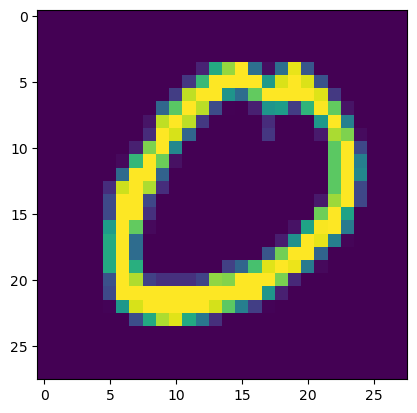

In [27]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [28]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [35]:
X_train.shape

(33600, 784)

In [36]:
from sklearn.neighbors import  KNeighborsClassifier 

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

10.925509452819824


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from  sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [44]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
X_train_trf.shape

(33600, 200)

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test_trf)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.9436904761904762

In [57]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf =pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

0.2569047619047619
0.3286904761904762
0.5064285714285715
0.6569047619047619
0.7271428571428571
0.8201190476190476
0.8325
0.8628571428571429
0.8760714285714286
0.9005952380952381
0.9071428571428571
0.9126190476190477
0.9196428571428571
0.9251190476190476
0.9272619047619047
0.930952380952381
0.9338095238095238
0.9351190476190476
0.9354761904761905
0.9391666666666667
0.9397619047619048
0.9371428571428572
0.9382142857142857
0.9402380952380952
0.9384523809523809
0.939047619047619
0.9404761904761905
0.9422619047619047
0.9432142857142857
0.9429761904761905
0.9433333333333334
0.9452380952380952
0.9454761904761905
0.9447619047619048
0.9480952380952381
0.9483333333333334
0.9482142857142857
0.9477380952380953
0.9475
0.9466666666666667
0.9476190476190476
0.9479761904761905
0.9473809523809524
0.9482142857142857
0.9473809523809524
0.9471428571428572
0.9479761904761905
0.9476190476190476
0.9479761904761905
0.9482142857142857
0.9470238095238095
0.9486904761904762
0.9477380952380953
0.9473809523809524


In [60]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [69]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)


fig.show()

In [80]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [81]:
X_train_trf

array([[-1.35842191e+00,  3.37492192e+00, -1.59759922e+00],
       [-6.21304397e+00,  5.24673404e+00, -5.99848990e+00],
       [-2.31017035e+00, -8.33517791e+00, -1.18765701e+00],
       ...,
       [-4.05728360e+00,  7.97602314e-04,  8.52645799e-01],
       [ 2.10205876e+00, -1.49513908e+00,  1.70738418e+00],
       [-7.19651367e+00, -7.52957517e-01,  1.97820075e+00]])

In [79]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
margin=dict(l=20,r=20,t=20,b=20),
paper_bgcolor="LightSteelBlue"
)
fig.show()

In [84]:
pca.components_.shape

(3, 784)

In [82]:
pca.explained_variance_ratio_

array([0.05750864, 0.04139484, 0.03788343])

In [86]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [87]:
pca.explained_variance_.shape

(784,)

In [88]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05750864, 0.09890348, 0.13678691, 0.16622933, 0.19197912,
       0.21441931, 0.23398137, 0.25183566, 0.26752912, 0.28178264,
       0.29545636, 0.30775272, 0.31921522, 0.33046682, 0.34098288,
       0.35118094, 0.36077618, 0.37010539, 0.3792686 , 0.38815287,
       0.39659044, 0.40474399, 0.41253012, 0.42011096, 0.42744672,
       0.43451877, 0.44147511, 0.44814825, 0.45444105, 0.46066002,
       0.46683014, 0.47282777, 0.47864765, 0.48443181, 0.49010298,
       0.49556916, 0.50099449, 0.50631147, 0.51139043, 0.5163496 ,
       0.52120925, 0.52598978, 0.5306388 , 0.53524431, 0.53979496,
       0.54430207, 0.54878805, 0.55321001, 0.5574935 , 0.5617681 ,
       0.56601994, 0.57021091, 0.57431178, 0.5783627 , 0.58233151,
       0.58628362, 0.59014607, 0.59388937, 0.59759036, 0.6012485 ,
       0.60481174, 0.60835457, 0.61184201, 0.61528382, 0.61872037,
       0.62209754, 0.62542605, 0.62872043, 0.63192404, 0.63510326,
       0.63827285, 0.64141336, 0.64453509, 0.64760379, 0.65066

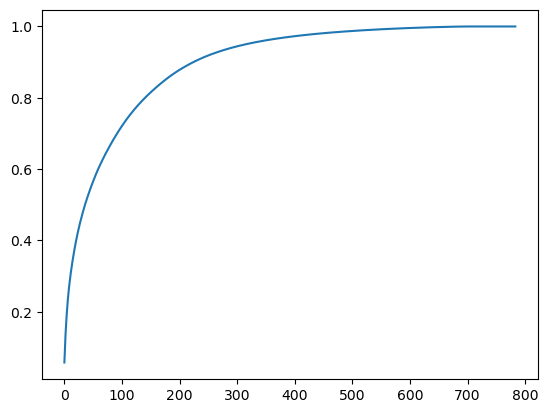

In [90]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))